In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
path ='/content/gdrive/MyDrive/SMT_3/ML/Praktikum/Praktikum03/Data/archive/day.csv'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

# membaca file csv
df = pd.read_csv(path)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [27]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
corr_matrix = df_numeric.corr()

# Tampilkan matriks korelasi
corr_with_cnt = corr_matrix['cnt'].sort_values(ascending=False)

print(corr_with_cnt)


cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


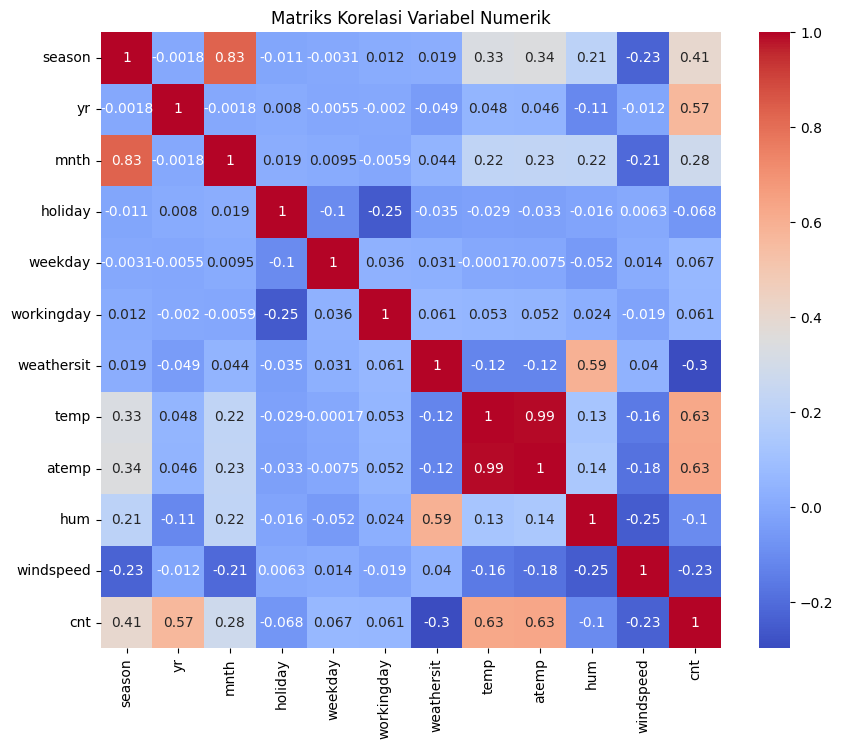

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

In [29]:

# Tentukan variabel target dan fitur
y = df['cnt']
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek jumlah data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))
print("Jumlah label train:", len(y_train))
print("Jumlah label test :", len(y_test))


Jumlah data train : 584
Jumlah data test  : 147
Jumlah label train: 584
Jumlah label test : 147


In [30]:
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
682,1.0,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,1.0,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,1.0,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,1.0,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,1.0,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


In [31]:
X_train_sm = sm.add_constant(X_train)

# Buat model regresi
model = sm.OLS(y_train, X_train_sm).fit()

# Tampilkan summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.56e-186
Time:                        16:44:06   Log-Likelihood:                -4784.9
No. Observations:                 584   AIC:                             9594.
Df Residuals:                     572   BIC:                             9646.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.3209    272.690      4.578      0.0